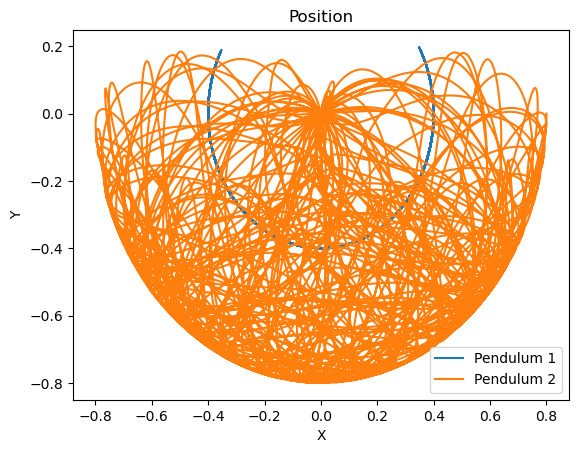

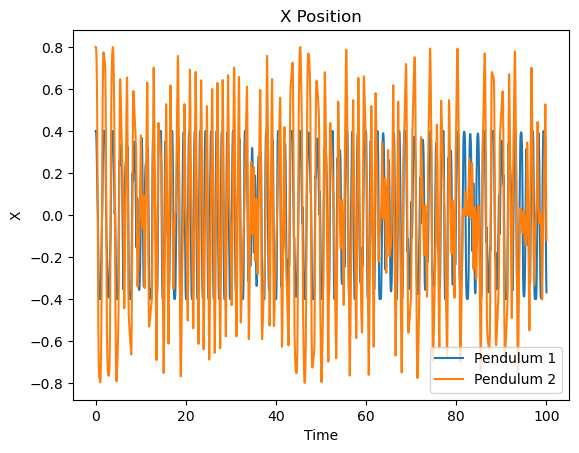

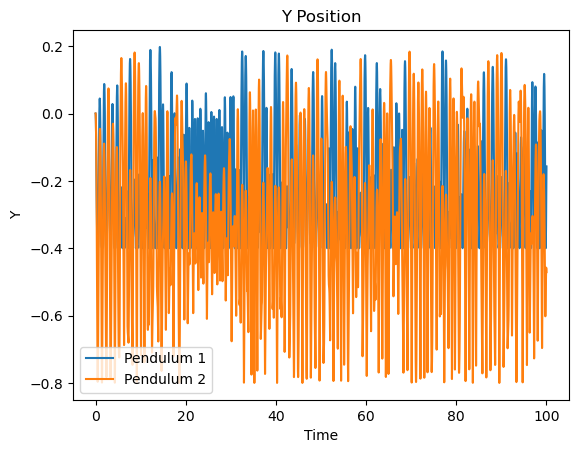

-3.283536749165705e-07


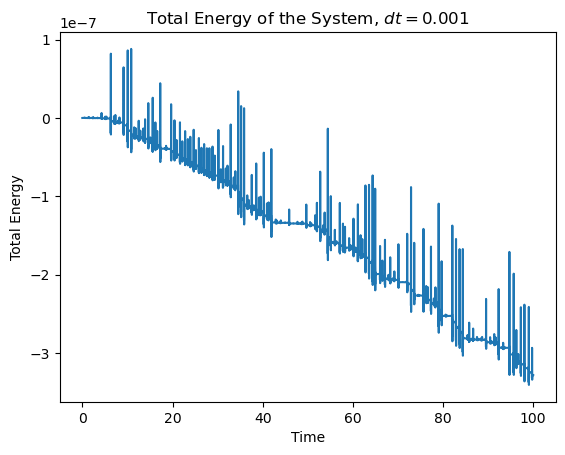

In [17]:
#Haleigh Brown and Douglas Nyberg 2/25/2023 PROJECT 1
########################################################
#This code simulates a double pendulum system by applying the Runge Kutta Four 
#method to solve the system of coupled equations of motion found with in this system
#
# theta0_1 = initial angular position for the first pendulum in the system 
# theta0_2 = initial angular position for the second pendulum in the system
#
# omega0_1 = initial angular velocity for the first pendulum in the system 
# omega0_2 = initial angular velocity for the second pendulum in the system 
#
# theta_1 = angular position of the first pendulum in the system 
# theta_2 = angular position of the second pendulum in the system 
#
# omega_1 = angular velocity of the first pendulum in the system 
# omega_2 = angular velocity of the second pendulum in the system
#
# V = potential energy
# T = kinetic energy
# E = total energy in of the system
# g = gravity
# l = pendlum length (assuming l_1 = l_2 = l)
# m = mass at the end of each pendulum (assuming m_1 = m_2 = m)
#
########################################################

import matplotlib.pyplot as plt
import numpy as np


#this function returns the total energy of the system (equation taken from lecture slide 4, PHSX333 Project 1)
def total_energy(m, g, l, theta_1, theta_2, omega_1, omega_2):
    V = (-1*m*g*l) * ((2*np.cos(theta_1)) + (np.cos(theta_2)))    
    #T = (.5*m*(l**2)) * ((2*(omega_1**2)) + (omega_2**2) + (2*np.cos(theta_1 - theta_2))*omega_1*omega_2)
    T = m*(l**2)*((omega_1**2) + ((1/2)*(omega_2**2)) + ((omega_1*omega_2)*(np.cos(theta_1 - theta_2))))
    E = V + T
    

    return(E)



#base functions using trick of breaking the odes into multiple ones
def f_x(r, t, g, l, m):
    theta_1 = r[0]
    theta_2 = r[1]

    omega_1 = r[2]    
    omega_2 = r[3]

    

    s2122 = (np.sin((2*theta_1) - (2*theta_2)))
    s12 = (np.sin((theta_1) - (theta_2)))
    s122 = (np.sin((theta_1) - (2*theta_2)))
    
    s212 = (np.sin((2*theta_1) - (theta_2)))
    
    s1 = (np.sin(theta_1))
    s2 = (np.sin(theta_2))
           
    c2122 = (np.cos((2*theta_1) - (2*theta_2)))


    
    #four coupled odes
    ftheta_1 = omega_1
    ftheta_2 = omega_2

     
    fomega_1 = -1*((((omega_1**2)*s2122) + ((2*(omega_2**2))*(s12)) + ((g/l)*(s122 + (3*s1))))/(3-c2122))
    fomega_2 = ((4*(omega_1**2)*s12 + ((omega_2**2)*(s2122)) + (2*(g/l)*(s212 - s2))) /(3-c2122))

    return np.array([ftheta_1, ftheta_2, fomega_1, fomega_2], float)





#runge-kutta method to obtain values
def runge_kutta(f_x):
    h = 0.001
    g = 9.81 #m/s**2
    l = 0.40 #m 
    m = 1 #kg Arbitrary?

    tPoints = np.arange(0, 100, h)
    
    x1Points = []
    y1Points = []
    x2Points = []
    y2Points = []
    EPoints = []
    
    theta0_1 = np.pi/2
    theta0_2 = theta0_1
    omega0_1 = 0
    omega0_2 = omega0_1
    
    r = np.array([theta0_1, theta0_2, omega0_1, omega0_2], float)
    for t in tPoints:
      
        EPoints.append(total_energy(m, g, l, r[0], r[1], r[2], r[3]))

        #adding x and y points for the first pendulum (calc. using theta_1)
        x1Points.append(l*np.sin(r[0]))
        y1Points.append(-l*np.cos(r[0]))

        #adding x and y points for the second pendulum (calc. using theta_2)
        x2Points.append(l*np.sin(r[0]) + l*np.sin(r[1]))
        y2Points.append(-l*np.cos(r[0]) - l*np.cos(r[1]))


        #runge-kutta four work horse
        k1 = h*f_x(r, t, g, l, m)
        k2 = h*f_x(r + .5*k1, t + .5*h, g, l, m)
        k3 = h*f_x(r + .5*k2, t + .5*h, g, l, m)
        k4 = h*f_x(r + k3, t + h, g, l, m)
        r += (k1 + 2*k2 + 2*k3 + k4)/6

    #need to keep track of x and y points vs time for both pendulums and energy
    return tPoints, x1Points, y1Points, x2Points, y2Points, EPoints



tPoints, x1Points, y1Points, x2Points, y2Points, EPoints = runge_kutta(f_x)


#Ploting Position
plt.plot(x1Points, y1Points, label = "Pendulum 1")
plt.plot(x2Points, y2Points, label = "Pendulum 2")
plt.title("Position")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()


#Ploting X Position
plt.plot(tPoints, x1Points, label = "Pendulum 1")
plt.plot(tPoints, x2Points, label = "Pendulum 2")
plt.title("X Position")
plt.xlabel("Time")
plt.ylabel("X")
plt.legend()
plt.show()


#Ploting Y Position
plt.plot(tPoints, y1Points, label = "Pendulum 1")
plt.plot(tPoints, y2Points, label = "Pendulum 2")
plt.title("Y Position")
plt.xlabel("Time")
plt.ylabel("Y")
plt.legend()
plt.show()

#Ploting Total Energy
print(EPoints[-1])
plt.plot(tPoints, EPoints, label = "Energy")
plt.title("Total Energy of the System, $dt = 0.001$")
plt.xlabel("Time")
plt.ylabel("Total Energy")
plt.show()
